### What's been done in this notebook:

1. did feature engineering on the data
2. used 4 different models
3. trained the models on using 
    i. all feature
    ii. using only the top 6 correlated features
4. evaluated the models using the test data
5. displayed the AUC-ROC curve for each model
6. Saved the trained models


In [1]:
# importing preprocessed data

import pandas as pd

df = pd.read_csv('data/preprocessed_data.csv')
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,property_Area,Loan_Status
0,0.693147,0,0.000000,0.000000,0.000000,0.376053,0.000000,0.500000,0.693147,2,1
1,0.693147,1,0.693147,0.000000,0.000000,0.274340,0.237511,0.504950,0.693147,0,0
2,0.693147,1,0.000000,0.000000,0.693147,0.226443,0.000000,0.198020,0.693147,2,1
3,0.693147,1,0.000000,0.693147,0.000000,0.199461,0.350093,0.465347,0.693147,2,1
4,0.693147,0,0.000000,0.000000,0.000000,0.382667,0.000000,0.569307,0.693147,2,1


### Feature Engineering


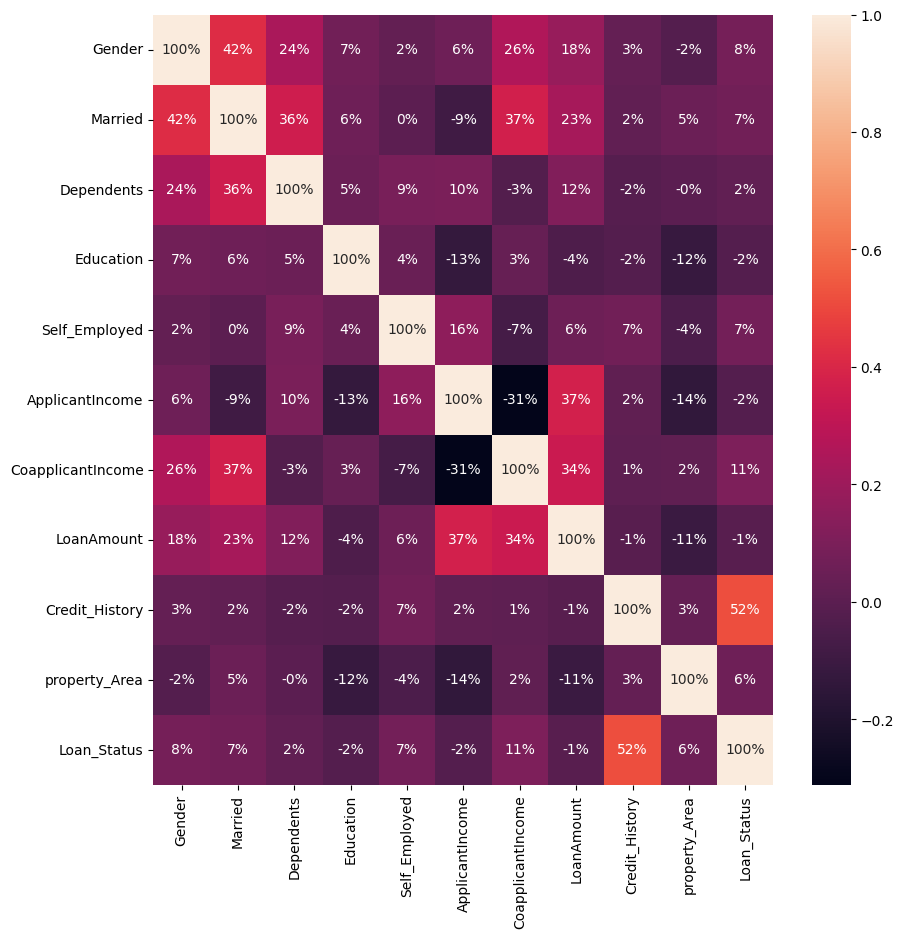

In [2]:
# checking for data corelation

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.0%')
plt.show()


In [3]:
# listing top 6 correlated features

correlated_features =  list(df.corr()['Loan_Status'].sort_values(ascending=False).head(7).keys())
print(correlated_features)


['Loan_Status', 'Credit_History', 'CoapplicantIncome', 'Gender', 'Self_Employed', 'Married', 'property_Area']


In [5]:
# creating a new dataframe with top 6 correlated features, since we will train models with both correlated only and all features

df_correlated = df[correlated_features]
df_correlated.head()


,Loan_Status,Credit_History,CoapplicantIncome,Gender,Self_Employed,Married,property_Area
0,1,0.693147,0.000000,0.693147,0.000000,0,2
1,0,0.693147,0.237511,0.693147,0.000000,1,0
2,1,0.693147,0.000000,0.693147,0.693147,1,2
3,1,0.693147,0.350093,0.693147,0.000000,1,2
4,1,0.693147,0.000000,0.693147,0.000000,0,2


In [6]:
# using SelectKBest to select top 6 features

from sklearn.feature_selection import SelectKBest

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

best_features = SelectKBest(k=6)
fit = best_features.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(6,'Score'))


               Specs       Score
8     Credit_History  226.105551
6  CoapplicantIncome    7.280885
0             Gender    4.142476
4      Self_Employed    3.494064
1            Married    3.001449
9      property_Area    2.215587


We can see that both correlation matrix and SelectKBest gave us the same result.   
We will use top 6 features only and all features, both for the training since sometimes the model can perform better with all features.


In [7]:
# splitting data into training and testing sets

from sklearn.model_selection import train_test_split

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_correlated = df_correlated.drop('Loan_Status', axis=1)
y_correlated = df_correlated['Loan_Status']

X_train_correlated, X_test_correlated, y_train_correlated, y_test_correlated = train_test_split(X_correlated, y_correlated, test_size=0.2, random_state=0)


## Model Selection

- We will try following models to predict loan eligibility:
    - Logistic Regression
    - Random Forest Classifier
    - Gradient Boosting Classifier
    - Support Vector Machines (SVM)
    <!-- - Artificial Neural Networks -->

<!-- Logistic Regression: This model can be used to classify customers into eligible and non-eligible categories based on their demographic and financial information. Logistic regression is a popular and efficient algorithm for binary classification problems like loan eligibility.

Random Forest Classifier: This is a tree-based ensemble algorithm that can handle both categorical and continuous data. It can be used to identify important features that determine loan eligibility and predict the outcome accurately.

Gradient Boosting Classifier: This is a powerful ensemble algorithm that can handle complex data sets and provides high accuracy. It can be used to predict the probability of loan eligibility based on the customer information provided.

Support Vector Machines (SVM): SVM is a popular machine learning algorithm used for classification problems. It can be used to build a model to predict loan eligibility by separating the eligible and non-eligible classes with a hyperplane.

Artificial Neural Networks: This is a deep learning algorithm that can handle large and complex datasets. It can be used to build a model to predict loan eligibility based on the customer data provided. Neural networks can learn complex patterns in the data and make accurate predictions. -->


In [29]:
# Tracking accuracy of models

accuracies = {}


In [20]:
# plotting confusion matrix for all models

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes, model_name):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    ax.set_title('Confusion Matrix for ' + model_name)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    plt.show()

classes = ['No', 'Yes']


In [8]:
# Training Logistic Regression Model

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)

LR_correlated = LogisticRegression()
LR_correlated.fit(X_train_correlated, y_train_correlated)


LogisticRegression()

In [30]:
from sklearn.metrics import accuracy_score

accuracies['Logistic Regression'] = accuracy_score(y_test, LR.predict(X_test))

print('Accuracy of Logistic Regression model is: ', accuracy_score(y_test, LR.predict(X_test)))
print('Accuracy of Logistic Regression model with correlated features is: ', accuracy_score(y_test_correlated, LR_correlated.predict(X_test_correlated)))


Accuracy of Logistic Regression model is:  0.752
Accuracy of Logistic Regression model with correlated features is:  0.744


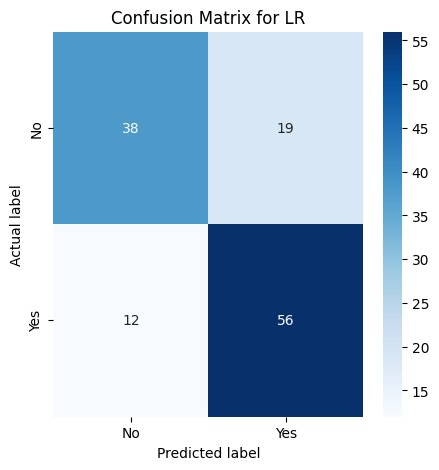

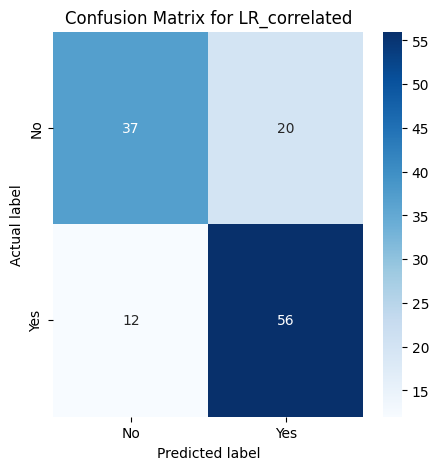

In [21]:

plot_confusion_matrix(y_test, LR.predict(X_test), classes, "LR")
plot_confusion_matrix(y_test_correlated, LR_correlated.predict(X_test_correlated), classes, "LR_correlated")


In [10]:
# Training random forest model

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X_train, y_train)

RF_correlated = RandomForestClassifier(n_estimators=100, random_state=0)
RF_correlated.fit(X_train_correlated, y_train_correlated)


RandomForestClassifier(random_state=0)

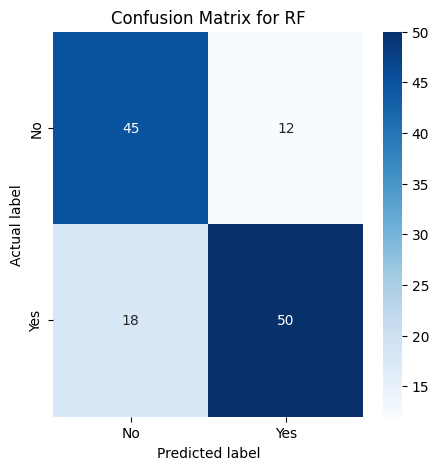

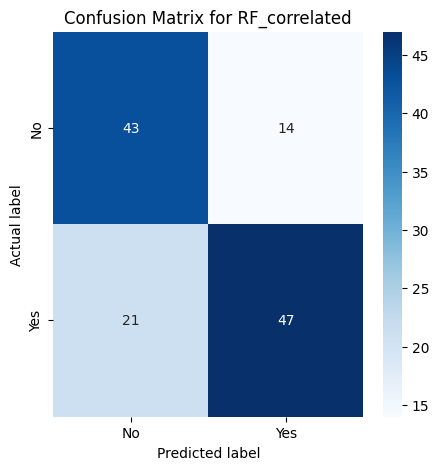

In [22]:

plot_confusion_matrix(y_test, RF.predict(X_test), classes, "RF")
plot_confusion_matrix(y_test_correlated, RF_correlated.predict(X_test_correlated), classes, "RF_correlated")


In [31]:

accuracies['Random Forest'] = accuracy_score(y_test, RF.predict(X_test))

print('Accuracy of Random Forest model is: ', accuracy_score(y_test, RF.predict(X_test)))
print('Accuracy of Random Forest model with correlated features is: ', accuracy_score(y_test_correlated, RF_correlated.predict(X_test_correlated)))


Accuracy of Random Forest model is:  0.76
Accuracy of Random Forest model with correlated features is:  0.72


In [12]:
# Training Gradient Boosting model

from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(n_estimators=100, random_state=0)
GB.fit(X_train, y_train)

GB_correlated = GradientBoostingClassifier(n_estimators=100, random_state=0)
GB_correlated.fit(X_train_correlated, y_train_correlated)


GradientBoostingClassifier(random_state=0)

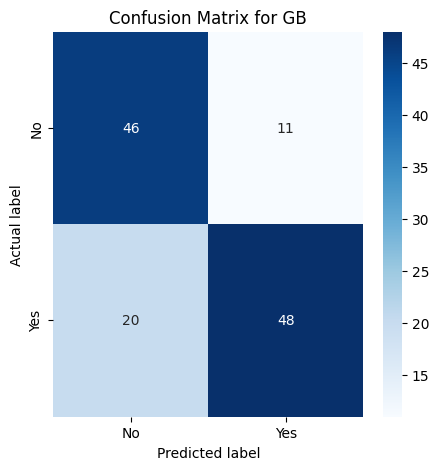

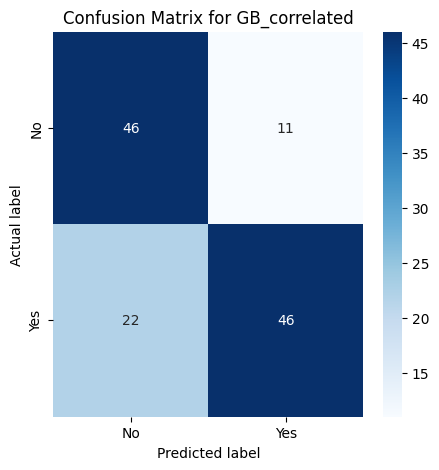

In [26]:
plot_confusion_matrix(y_test, GB.predict(X_test), classes, "GB")
plot_confusion_matrix(y_test_correlated, GB_correlated.predict(X_test_correlated), classes, "GB_correlated")


In [32]:

accuracies['Gradient Boosting'] = accuracy_score(y_test, GB.predict(X_test))

print('Accuracy of Gradient Boosting model is: ', accuracy_score(y_test, GB.predict(X_test)))
print('Accuracy of Gradient Boosting model with correlated features is: ', accuracy_score(y_test_correlated, GB_correlated.predict(X_test_correlated)))


Accuracy of Gradient Boosting model is:  0.752
Accuracy of Gradient Boosting model with correlated features is:  0.736


In [14]:
# Training Support Vector Machine model

from sklearn.svm import SVC

SVM = SVC(random_state=0, probability=True) # probability=True is used to get the probability of the prediction, used for ROC AUC curve
SVM.fit(X_train, y_train)

SVM_correlated = SVC(random_state=0, probability=True)
SVM_correlated.fit(X_train_correlated, y_train_correlated)


SVC(probability=True, random_state=0)

In [33]:

accuracies['Support Vector Machine'] = accuracy_score(y_test, SVM.predict(X_test))

print('Accuracy of Support Vector Machine model is: ', accuracy_score(y_test, SVM.predict(X_test)))
print('Accuracy of Support Vector Machine model with correlated features is: ', accuracy_score(y_test_correlated, SVM_correlated.predict(X_test_correlated)))


Accuracy of Support Vector Machine model is:  0.776
Accuracy of Support Vector Machine model with correlated features is:  0.76


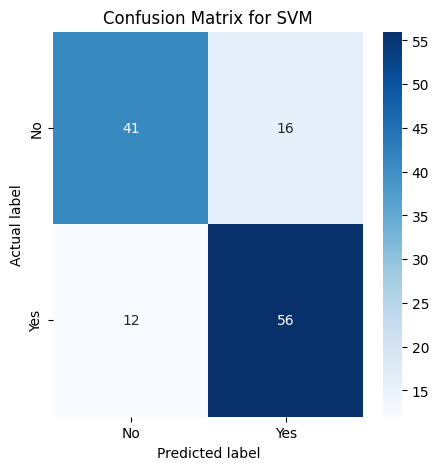

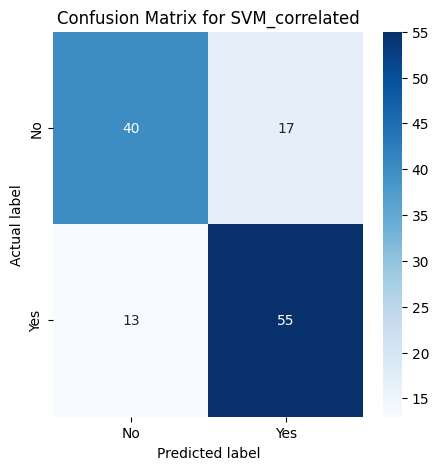

In [27]:

plot_confusion_matrix(y_test, SVM.predict(X_test), classes, "SVM")
plot_confusion_matrix(y_test_correlated, SVM_correlated.predict(X_test_correlated), classes, "SVM_correlated")


In [17]:
# Saving all models

import pickle

pickle.dump(LR, open('models/LR_model.pkl', 'wb'))
pickle.dump(LR_correlated, open('models/LR_correlated_model.pkl', 'wb'))

pickle.dump(RF, open('models/RF_model.pkl', 'wb'))
pickle.dump(RF_correlated, open('models/RF_correlated_model.pkl', 'wb'))

pickle.dump(GB, open('models/GB_model.pkl', 'wb'))
pickle.dump(GB_correlated, open('models/GB_correlated_model.pkl', 'wb'))

pickle.dump(SVM, open('models/SVM_model.pkl', 'wb'))
pickle.dump(SVM_correlated, open('models/SVM_correlated_model.pkl', 'wb'))


In [18]:
# Saving all X and y data

X_train.to_csv('data/dataSplits/X_train.csv', index=False)
y_train.to_csv('data/dataSplits/y_train.csv', index=False)

X_test.to_csv('data/dataSplits/X_test.csv', index=False)
y_test.to_csv('data/dataSplits/y_test.csv', index=False)

X_train_correlated.to_csv('data/dataSplits/X_train_correlated.csv', index=False)
y_train_correlated.to_csv('data/dataSplits/y_train_correlated.csv', index=False)

X_test_correlated.to_csv('data/dataSplits/X_test_correlated.csv', index=False)
y_test_correlated.to_csv('data/dataSplits/y_test_correlated.csv', index=False)


In [2]:
# importing saved trained models -- AFTER A WHILE

import pickle

LR = pickle.load(open('models/LR_model.pkl', 'rb'))
LR_correlated = pickle.load(open('models/LR_correlated_model.pkl', 'rb'))

RF = pickle.load(open('models/RF_model.pkl', 'rb'))
RF_correlated = pickle.load(open('models/RF_correlated_model.pkl', 'rb'))

GB = pickle.load(open('models/GB_model.pkl', 'rb'))
GB_correlated = pickle.load(open('models/GB_correlated_model.pkl', 'rb'))

SVM = pickle.load(open('models/SVM_model.pkl', 'rb'))
SVM_correlated = pickle.load(open('models/SVM_correlated_model.pkl', 'rb'))


In [6]:
# importing all train and test data -- AFTER A WHILE

import pandas as pd

X_train = pd.read_csv('data/dataSplits/X_train.csv')
y_train = pd.read_csv('data/dataSplits/y_train.csv')

X_test = pd.read_csv('data/dataSplits/X_test.csv')
y_test = pd.read_csv('data/dataSplits/y_test.csv')

X_train_correlated = pd.read_csv('data/dataSplits/X_train_correlated.csv')
y_train_correlated = pd.read_csv('data/dataSplits/y_train_correlated.csv')

X_test_correlated = pd.read_csv('data/dataSplits/X_test_correlated.csv')
y_test_correlated = pd.read_csv('data/dataSplits/y_test_correlated.csv')

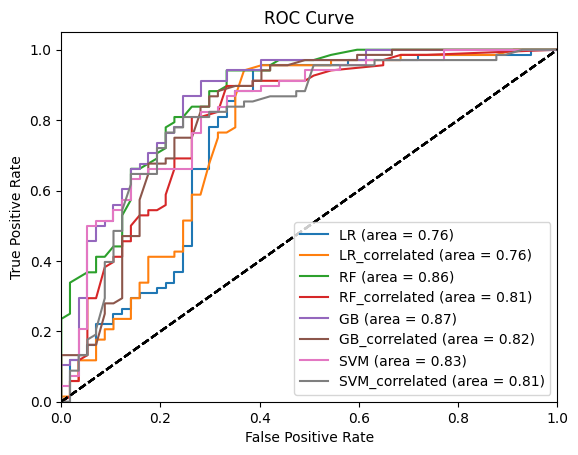

In [ ]:
# plotting ROC curve for all models on same plot

from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=model_name + ' (area = %0.2f)' % roc_auc)

    
    plt.plot([0, 1], [0, 1], 'k--') # plot diagonal line
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    plt.legend(loc="lower right")

plot_roc_curve(y_test, LR.predict_proba(X_test)[:,1], "LR")
plot_roc_curve(y_test_correlated, LR_correlated.predict_proba(X_test_correlated)[:,1], "LR_correlated")

plot_roc_curve(y_test, RF.predict_proba(X_test)[:,1], "RF")
plot_roc_curve(y_test_correlated, RF_correlated.predict_proba(X_test_correlated)[:,1], "RF_correlated")

plot_roc_curve(y_test, GB.predict_proba(X_test)[:,1], "GB")
plot_roc_curve(y_test_correlated, GB_correlated.predict_proba(X_test_correlated)[:,1], "GB_correlated")

plot_roc_curve(y_test, SVM.predict_proba(X_test)[:,1], "SVM")
plot_roc_curve(y_test_correlated, SVM_correlated.predict_proba(X_test_correlated)[:,1], "SVM_correlated")


In [4]:
# accuracy scores for all models

print(accuracies, end="\n\n")

print(f"Maximum accuracy: {max(accuracies)}: {accuracies[max(accuracies)]*100}%")


NameError: name 'accuracies' is not defined

In [7]:
# Voting classifier

from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('LR', LR), ('LR_correlated', LR_correlated), ('RF', RF), ('RF_correlated', RF_correlated), ('GB', GB), ('GB_correlated', GB_correlated), ('SVM', SVM), ('SVM_correlated', SVM_correlated)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

from sklearn.metrics import accuracy_score

print("Voting Classifier accuracy: ", accuracy_score(y_test, y_pred))


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Voting Classifier accuracy:  0.784
